In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
#Generating dataset
(a,b) = (6,5)
stdd_y = 1.4
Y = 150
np.random.seed(3)
y_a = np.random.randn(Y) * stdd_y + a
y_b = np.random.randn(Y) * stdd_y + b

(c,d) = (2,3)
stdd_N = 1.0
N = 120
N_a = np.random.randn(N) * stdd_N + c
N_b = np.random.randn(N) * stdd_N + d

In [32]:
#Concatenating the data
data = []
for i in range(Y):
    row = []
    row.append(y_a[i]) #Appending Mary's rating for "Yes"
    row.append(y_b[i]) #Appending John's rating for "Yes"
    row.append(1) #1 for YES
    data.append(row)
#Appending NO data
for i in range(N):
    row = []
    row.append(N_a[i]) #Appending Mary's rating for "No"
    row.append(N_b[i]) #Appending John's rating for "No"
    row.append(0) #0 for NO
    data.append(row)

np.random.shuffle(data)
X = []
y = []
for i in range(len(data)):
    X.append(data[i][:2])
    y.append(data[i][2])


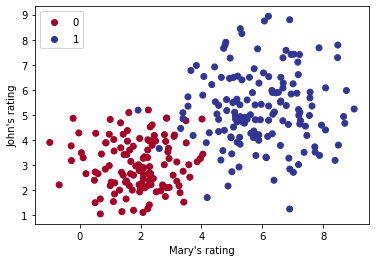

In [45]:
fig, ax = plt.subplots()
scatter = ax.scatter(np.asarray(X).T[0],np.asarray(X).T[1], c = y, cmap =plt.cm.RdYlBu);
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left")
ax.add_artist(legend1)
plt.xlabel("Mary's rating")
plt.ylabel("John's rating")
plt.show()

In [59]:
#Splitting data for train and test
p  = int(len(data)*0.8) #80% training 20% test ratio
training_data, test_data = np.asarray(data[:p]), np.asarray(data[p:])
X_train, X_test, y_train, y_test = np.asarray(X[:p]), np.asarray(X[p:]), np.asarray(y[:p]), np.asarray(y[p:])
y_train, y_test = y_train.reshape(len(y_train), 1), y_test.reshape(len(y_test), 1)


In [68]:
def summation(inputs, weights, bias):
    return np.dot(inputs, weights) + bias
    
def sigmoid(weighted_sum):
    return 1.0 / (1.0 + np.exp(-weighted_sum)) 

    
def sum_of_squares(y_train, y_predict):
    return np.sum((y_train - y_predict)**2)

def accuracy(y_train, y_predict):
    count = 0
    count_no, count_yes = 0, 0
    n = len(y_train)
    n_no, n_yes = 0, 0
    acc_yes, acc_no = 0, 0
    for i in range(n):
        if y_train[i] == [0]: n_no += 1
        else: n_yes += 1
        if (y_predict[i] < 0.5 and y_train[i] == [0]):
            count += 1   
            count_no += 1
        elif (y_predict[i] >= 0.5 and y_train[i] == [1]):
            count += 1 
            count_yes += 1
    acc = count / n * 100
    if n_no != 0 and n_yes!=0:
        acc_yes = count_yes / n_yes * 100
        acc_no = count_no / n_no * 100
    return acc, acc_yes, acc_no

In [61]:
#Batch Gradient 
def gradient_descent(num_iter, X_train, y_train, learning_rate):
    m = X_train.shape[0]
    input_layer_size = X_train.shape[1]
    output_layer_size = y_train.shape[1]
    np.random.seed(1)
    weights = np.random.random((input_layer_size,output_layer_size))
    bias = 0
    error = []
    W = []
    acc = []
    acc_yes, acc_no = 0, 0
    for i in range(num_iter):
        W.append(weights)
        Z = summation(X_train, weights, bias)
        A = sigmoid(Z)
        diff = sum_of_squares(y_train, A)
        error.append(diff)
        dZ = 2 * (A - y_train) * (1 - A) * A
        dW = (1/m) * np.dot(X_train.T, dZ)
        dB = (1/m) * np.sum(dZ)
        weights = weights - learning_rate * dW
        bias = bias - learning_rate * dB
        accur, acc_yes, acc_no = accuracy(y_train, A)
        acc.append(accur)
    return error, W, acc, acc_yes, acc_no

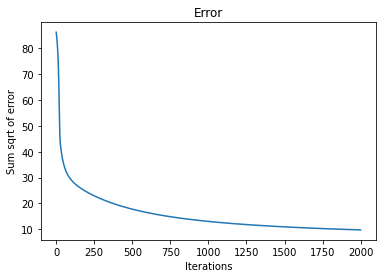

In [81]:
learning_rate = 0.1
num_iter = 2000
error, W, acc, acc_yes, acc_no = gradient_descent(num_iter, X_train, y_train, learning_rate)
#Iteration vs Error plot
itr = [i for i in range(num_iter)]
plt.plot(itr, error)
plt.xlabel("Iterations")
plt.ylabel("Sum sqrt of error")
plt.title("Error")
plt.show()

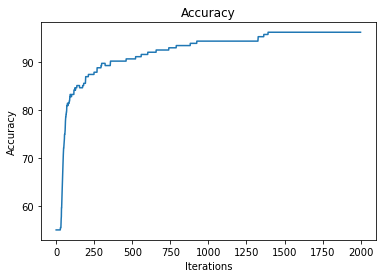

In [82]:
#Iteration vs Accuracy
itr = [i for i in range(num_iter)]
plt.plot(itr, acc)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.show()

(2000, 2, 1)


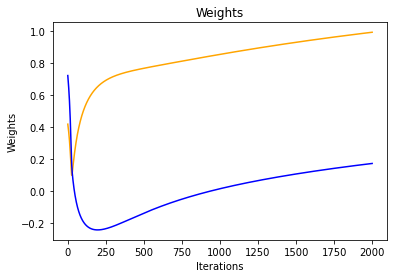

In [85]:
#Weights
itr = [i for i in range(num_iter)]
W = np.asarray(W)
print(W.shape)
plt.plot(itr, W.T[0][0], color = 'orange')
plt.plot(itr, W.T[0][1], color = 'blue')
plt.xlabel("Iterations")
plt.ylabel("Weights")
plt.title("Weights")
plt.show()

In [65]:
print("BGD \ -------Accuracy by class-------------\ No:{0:.2f}% Yes:{1:.2f}%".format(acc_no, acc_yes))

BGD \ -------Accuracy by class-------------\ No:95.88% Yes:96.64%


In [69]:
#Stochastic Gradient Descend
def SGD(train_data, mini_batch_size, epoch, learning_rate):
    m = train_data.shape[0]
    error = []
    W = []
    acc = []
    acc_yes, acc_no = 0, 0
    np.random.shuffle(train_data)
    mini_batches = [training_data[k:k+mini_batch_size] for k in range(0, m, mini_batch_size)]
    for mini_batch in mini_batches:
        X_train = mini_batch.T[:2].T
        y_train = mini_batch.T[2].T.reshape(len(mini_batch), 1)
        e, w, accur, acc_yes, acc_no = gradient_descent(epoch, X_train, y_train, learning_rate)
        error.append(e)
        W.append(w)
        acc.append(accur)
    return error, W, acc, acc_yes, acc_no

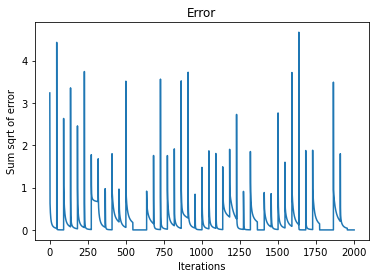

In [111]:
learning_rate = 0.1
epoch = 2000
mini_batch_size = 5
error, W, acc, acc_yes, acc_no = SGD(training_data, mini_batch_size, epoch, learning_rate)
#Iteration vs Error plot
error = np.asarray(error).flatten()
x = np.linspace(0, num_iter, len(error))
plt.plot(x, error)
plt.xlabel("Iterations")
plt.ylabel("Sum sqrt of error")
plt.title("Error")
plt.show()

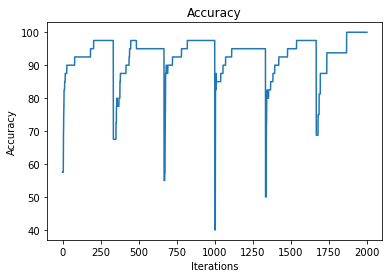

In [107]:
#Iteration vs Accuracy
acc = np.asarray(acc).flatten()
x = np.linspace(0, num_iter, len(acc))
plt.plot(x, acc)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.show()

Text(0.5, 1.0, 'Weights')

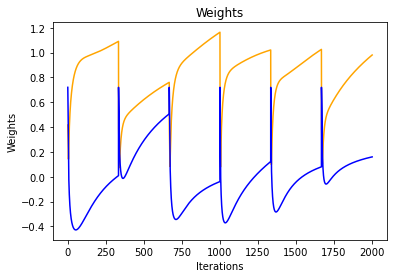

In [108]:
#Weights
weights = []
for i in range(len(W)):
    for j in range(epoch):
        weights.append(W[i][j])
weights = np.asarray(weights)
x = np.linspace(0, num_iter, len(weights))
plt.plot(x, weights.T[0][0], color = 'orange')
plt.plot(x, weights.T[0][1], color = 'blue')
plt.xlabel("Iterations")
plt.ylabel("Weights")
plt.title("Weights")
#plt.show()

In [109]:
print("SGD \ -------Accuracy by class-------------\ No:{0:.2f}% Yes:{1:.2f}%".format(acc_no, acc_yes))

SGD \ -------Accuracy by class-------------\ No:100.00% Yes:100.00%
